In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [115]:
data=load_breast_cancer()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target)
x.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [116]:
y.value_counts()

1    357
0    212
dtype: int64

In [117]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [119]:
model=LogisticRegression(C=95,penalty='l1',solver='liblinear')

In [120]:
model.fit(x_train,y_train)

LogisticRegression(C=95, penalty='l1', solver='liblinear')

In [121]:
accuracy = model.score(x_test,y_test)

In [122]:
accuracy

0.9473684210526315

In [123]:
prediction = model.predict(x_test)

In [124]:
prediction[1:10]

array([1, 0, 1, 0, 1, 0, 1, 1, 0])

In [125]:
y_test[1:10]

174    1
449    0
557    1
108    0
197    0
257    0
268    1
463    1
328    0
dtype: int32

In [126]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,prediction)

In [127]:
matrix

array([[ 58,   7],
       [  2, 104]], dtype=int64)

In [128]:
prob = model.predict_proba(x_test)

In [129]:
prob

array([[7.92205290e-02, 9.20779471e-01],
       [2.58440134e-08, 9.99999974e-01],
       [1.00000000e+00, 1.41317100e-17],
       [9.59081039e-04, 9.99040919e-01],
       [1.00000000e+00, 2.14644800e-27],
       [2.06651088e-01, 7.93348912e-01],
       [9.99998890e-01, 1.10979307e-06],
       [6.70635927e-06, 9.99993294e-01],
       [2.73084961e-05, 9.99972692e-01],
       [9.99999733e-01, 2.66698100e-07],
       [5.77647613e-07, 9.99999422e-01],
       [1.00000000e+00, 3.25149724e-15],
       [1.17913252e-05, 9.99988209e-01],
       [7.75162823e-10, 9.99999999e-01],
       [7.72592568e-07, 9.99999227e-01],
       [1.19210257e-07, 9.99999881e-01],
       [2.67575693e-08, 9.99999973e-01],
       [2.87400402e-04, 9.99712600e-01],
       [1.02348004e-07, 9.99999898e-01],
       [1.04075794e-07, 9.99999896e-01],
       [5.05748478e-07, 9.99999494e-01],
       [1.64458389e-04, 9.99835542e-01],
       [9.99999991e-01, 8.54334753e-09],
       [8.16003255e-07, 9.99999184e-01],
       [4.945481

In [130]:
from sklearn.metrics import roc_curve
prob2=prob[:,1]
FPR,TPR,th=roc_curve(y_test,prob2)

0.9728592162554426


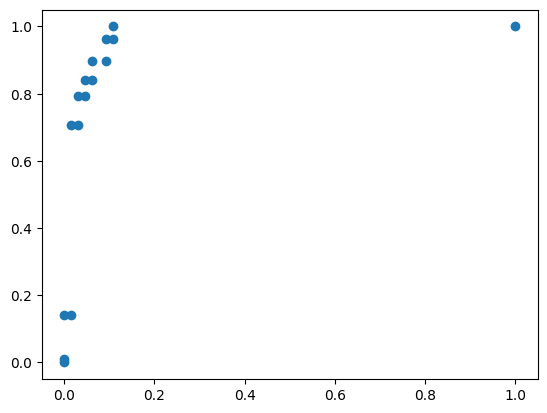

In [131]:
plt.scatter(FPR,TPR)
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,prob2)
print(auc)